In [46]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns



In [47]:
# Step 1: Load the dataset
csv_file = '01_District_wise_crimes_committed_IPC_2001_2012.csv'
df = pd.read_csv(csv_file)


In [48]:
df.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507


In [49]:
df.tail()


,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,1,186,0,2,0,1,0,44,392,787
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,0,7,17,...,20,632,0,7,2,5,0,219,1668,3494
9016,PUDUCHERRY,TOTAL,2012,29,27,12,13,0,13,19,...,21,818,0,9,2,6,0,263,2060,4281


In [50]:
df.shape

(9017, 33)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9017 entries, 0 to 9016
Data columns (total 33 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             9017 non-null   object
 1   DISTRICT                                             9017 non-null   object
 2   YEAR                                                 9017 non-null   int64 
 3   MURDER                                               9017 non-null   int64 
 4   ATTEMPT TO MURDER                                    9017 non-null   int64 
 5   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            9017 non-null   int64 
 6   RAPE                                                 9017 non-null   int64 
 7   CUSTODIAL RAPE                                       9017 non-null   int64 
 8   OTHER RAPE                                           9017 non-null   int64 
 9

In [52]:
df.dtypes

STATE/UT                                               object
DISTRICT                                               object
YEAR                                                    int64
MURDER                                                  int64
ATTEMPT TO MURDER                                       int64
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER               int64
RAPE                                                    int64
CUSTODIAL RAPE                                          int64
OTHER RAPE                                              int64
KIDNAPPING & ABDUCTION                                  int64
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS             int64
KIDNAPPING AND ABDUCTION OF OTHERS                      int64
DACOITY                                                 int64
PREPARATION AND ASSEMBLY FOR DACOITY                    int64
ROBBERY                                                 int64
BURGLARY                                                int64
THEFT   

In [53]:
df.describe()

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
count,9017.000000,9017.00000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,...,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000
mean,2006.629034,89.28535,78.069646,9.895531,53.041366,0.005767,53.035599,79.152046,58.535433,20.616613,...,25.219918,747.893091,20.228901,100.511257,27.515582,194.122435,0.197849,222.216702,2174.299434,5310.115116
std,3.463623,327.27503,303.446020,59.521657,190.741450,0.115223,190.725474,317.630964,246.937464,88.586415,...,98.880282,3024.106467,96.970466,394.059436,167.237522,831.986594,2.415039,936.002540,7988.438462,18524.381119
min,2001.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,18.00000,10.000000,0.000000,8.000000,0.000000,8.000000,10.000000,6.000000,1.000000,...,2.000000,43.000000,1.000000,10.000000,0.000000,11.000000,0.000000,5.000000,265.000000,853.000000
50%,2007.000000,38.00000,28.000000,2.000000,20.000000,0.000000,20.000000,25.000000,18.000000,5.000000,...,8.000000,199.000000,5.000000,31.000000,2.000000,47.000000,0.000000,68.000000,745.000000,2096.000000
75%,2010.000000,66.00000,56.000000,6.000000,41.000000,0.000000,41.000000,56.000000,42.000000,13.000000,...,20.000000,529.000000,16.000000,76.000000,13.000000,135.000000,0.000000,177.000000,1608.000000,3972.000000
max,2012.000000,7601.00000,7964.000000,1616.000000,3425.000000,5.000000,3425.000000,8878.000000,7910.000000,2416.000000,...,2830.000000,56768.000000,2322.000000,7118.000000,4970.000000,19865.000000,83.000000,16076.000000,124176.000000,220335.000000


In [54]:
# Select relevant features for clustering
# Modify the feature list based on the actual dataset columns
features = ['MURDER', 'RAPE', 'KIDNAPPING & ABDUCTION', 'THEFT']
X = df[features]


In [55]:
# Step 3: Normalize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4.1  "Create 3 clusters as below.

In [56]:
# Step 4: Cluster the Data
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_scaled)
df['cluster'] = kmeans.labels_

In [57]:

# Step 5: Label the Clusters
# Map cluster labels to descriptive names
# Inspect the cluster characteristics to ensure correct mapping
cluster_labels = {
    0: 'Sensitive Areas',
    1: 'Moderate Areas',
    2: 'Peaceful Areas'
}

In [58]:

df['cluster_label'] = df['cluster'].map(cluster_labels)

# Display the DataFrame with cluster labels
df[['DISTRICT', 'STATE/UT', 'cluster_label']].head()

,DISTRICT,STATE/UT,cluster_label
0,ADILABAD,ANDHRA PRADESH,Sensitive Areas
1,ANANTAPUR,ANDHRA PRADESH,Sensitive Areas
2,CHITTOOR,ANDHRA PRADESH,Sensitive Areas
3,CUDDAPAH,ANDHRA PRADESH,Sensitive Areas
4,EAST GODAVARI,ANDHRA PRADESH,Sensitive Areas


In [59]:
# Display the first few rows of the DataFrame with cluster labels
df[['DISTRICT', 'STATE/UT', 'cluster', 'cluster_label'] + features].head()

,DISTRICT,STATE/UT,cluster,cluster_label,MURDER,RAPE,KIDNAPPING & ABDUCTION,THEFT
0,ADILABAD,ANDHRA PRADESH,0,Sensitive Areas,101,50,46,199
1,ANANTAPUR,ANDHRA PRADESH,0,Sensitive Areas,151,23,53,366
2,CHITTOOR,ANDHRA PRADESH,0,Sensitive Areas,101,27,59,723
3,CUDDAPAH,ANDHRA PRADESH,0,Sensitive Areas,80,20,25,173
4,EAST GODAVARI,ANDHRA PRADESH,0,Sensitive Areas,82,23,49,1021


In [60]:
# Group by cluster_label and calculate mean values for each cluster
cluster_summary = df.groupby('cluster_label')[features].mean()
print(cluster_summary)

                      MURDER         RAPE  KIDNAPPING & ABDUCTION  \
cluster_label                                                       
Moderate Areas   3047.957746  1737.492958             2606.436620   
Peaceful Areas   1234.992000   757.408000             1149.688000   
Sensitive Areas    49.235574    29.501871               43.639723   

                        THEFT  
cluster_label                  
Moderate Areas   24842.070423  
Peaceful Areas   12104.968000  
Sensitive Areas    422.191588  


In [61]:
# Display data for 'Sensitive Areas'
sensitive_areas = df[df['cluster_label'] == 'Sensitive Areas']
print("Sensitive Areas:")
print(sensitive_areas[['DISTRICT', 'STATE/UT', 'cluster', 'cluster_label'] + features].head())

# Display data for 'Moderate Areas'
moderate_areas = df[df['cluster_label'] == 'Moderate Areas']
print("\nModerate Areas:")
print(moderate_areas[['DISTRICT', 'STATE/UT', 'cluster', 'cluster_label'] + features].head())

# Display data for 'Peaceful Areas'
peaceful_areas = df[df['cluster_label'] == 'Peaceful Areas']
print("\nPeaceful Areas:")
print(peaceful_areas[['DISTRICT', 'STATE/UT', 'cluster', 'cluster_label'] + features].head())


Sensitive Areas:
        DISTRICT        STATE/UT  cluster    cluster_label  MURDER  RAPE  \
0       ADILABAD  ANDHRA PRADESH        0  Sensitive Areas     101    50   
1      ANANTAPUR  ANDHRA PRADESH        0  Sensitive Areas     151    23   
2       CHITTOOR  ANDHRA PRADESH        0  Sensitive Areas     101    27   
3       CUDDAPAH  ANDHRA PRADESH        0  Sensitive Areas      80    20   
4  EAST GODAVARI  ANDHRA PRADESH        0  Sensitive Areas      82    23   

   KIDNAPPING & ABDUCTION  THEFT  
0                      46    199  
1                      53    366  
2                      59    723  
3                      25    173  
4                      49   1021  

Moderate Areas:
    DISTRICT        STATE/UT  cluster   cluster_label  MURDER  RAPE  \
115    TOTAL           BIHAR        1  Moderate Areas    3643   888   
351    TOTAL  MADHYA PRADESH        1  Moderate Areas    2425  2851   
397    TOTAL     MAHARASHTRA        1  Moderate Areas    2839  1302   
650    TOTAL   

# 4.2  Create DataFrame for each cluster that shows data according to the areas.



In [62]:
# Create a DataFrame for 'Sensitive Areas'
sensitive_areas_df = df[df['cluster_label'] == 'Sensitive Areas']
print("Sensitive Areas DataFrame:")
print(sensitive_areas_df.head())

# Create a DataFrame for 'Moderate Areas'
moderate_areas_df = df[df['cluster_label'] == 'Moderate Areas']
print("\nModerate Areas DataFrame:")
print(moderate_areas_df.head())

# Create a DataFrame for 'Peaceful Areas'
peaceful_areas_df = df[df['cluster_label'] == 'Peaceful Areas']
print("\nPeaceful Areas DataFrame:")
print(peaceful_areas_df.head())

# Optionally, save these DataFrames to CSV files
sensitive_areas_df.to_csv('sensitive_areas.csv', index=False)
moderate_areas_df.to_csv('moderate_areas.csv', index=False)
peaceful_areas_df.to_csv('peaceful_areas.csv', index=False)

Sensitive Areas DataFrame:
         STATE/UT       DISTRICT  YEAR  MURDER  ATTEMPT TO MURDER  \
0  ANDHRA PRADESH       ADILABAD  2001     101                 60   
1  ANDHRA PRADESH      ANANTAPUR  2001     151                125   
2  ANDHRA PRADESH       CHITTOOR  2001     101                 57   
3  ANDHRA PRADESH       CUDDAPAH  2001      80                 53   
4  ANDHRA PRADESH  EAST GODAVARI  2001      82                 67   

   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
0                                         17    50               0   
1                                          1    23               0   
2                                          2    27               0   
3                                          1    20               0   
4                                          1    23               0   

   OTHER RAPE  KIDNAPPING & ABDUCTION  ...  DOWRY DEATHS  \
0          50                      46  ...            16   
1          23    

# 4.3  "Analyze your clusters and prepare a report that explains all your observations.



Example - 

1. What is impacting more crimes in sensitive areas. 

2. What needs to be done to reduce crime. 

3. Most safe and unsafe districts.

4. Etc.......Anything that you observe (If you want, you can plot various graphs to analyze)"



In [63]:
# Step 1: Cluster Analysis
cluster_summary = df.groupby('cluster_label')[features].mean()
print("Cluster Summary:")
print(cluster_summary)

Cluster Summary:
                      MURDER         RAPE  KIDNAPPING & ABDUCTION  \
cluster_label                                                       
Moderate Areas   3047.957746  1737.492958             2606.436620   
Peaceful Areas   1234.992000   757.408000             1149.688000   
Sensitive Areas    49.235574    29.501871               43.639723   

                        THEFT  
cluster_label                  
Moderate Areas   24842.070423  
Peaceful Areas   12104.968000  
Sensitive Areas    422.191588  


In [64]:
# Step 2: Feature Importance
cluster_details = df.groupby('cluster_label')[features].agg(['mean', 'std'])
print("\nCluster Details:")
print(cluster_details)



Cluster Details:
                      MURDER                      RAPE              \
                        mean          std         mean         std   
cluster_label                                                        
Moderate Areas   3047.957746  1293.773577  1737.492958  690.705889   
Peaceful Areas   1234.992000   416.583928   757.408000  325.242269   
Sensitive Areas    49.235574    55.594701    29.501871   38.616166   

                KIDNAPPING & ABDUCTION                      THEFT  \
                                  mean          std          mean   
cluster_label                                                       
Moderate Areas             2606.436620  1694.754232  24842.070423   
Peaceful Areas             1149.688000   713.714855  12104.968000   
Sensitive Areas              43.639723    65.233115    422.191588   

                               
                          std  
cluster_label                  
Moderate Areas   11666.627019  
Peaceful Areas    

<Figure size 1200x600 with 0 Axes>

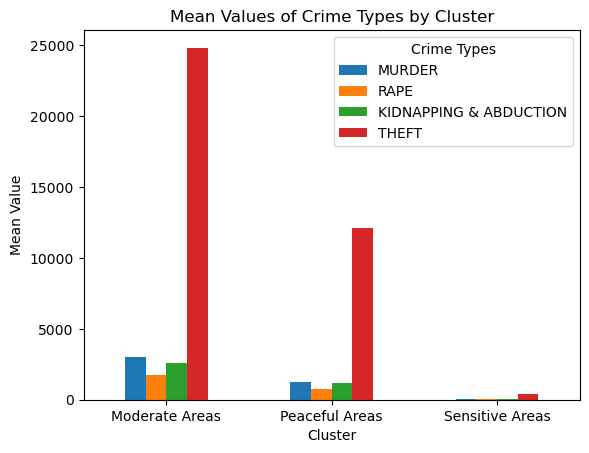

In [65]:
# Step 4: Visualization

# Plot the mean values of features for each cluster
plt.figure(figsize=(12, 6))
cluster_summary.plot(kind='bar')
plt.title('Mean Values of Crime Types by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)
plt.legend(title='Crime Types')
plt.show()

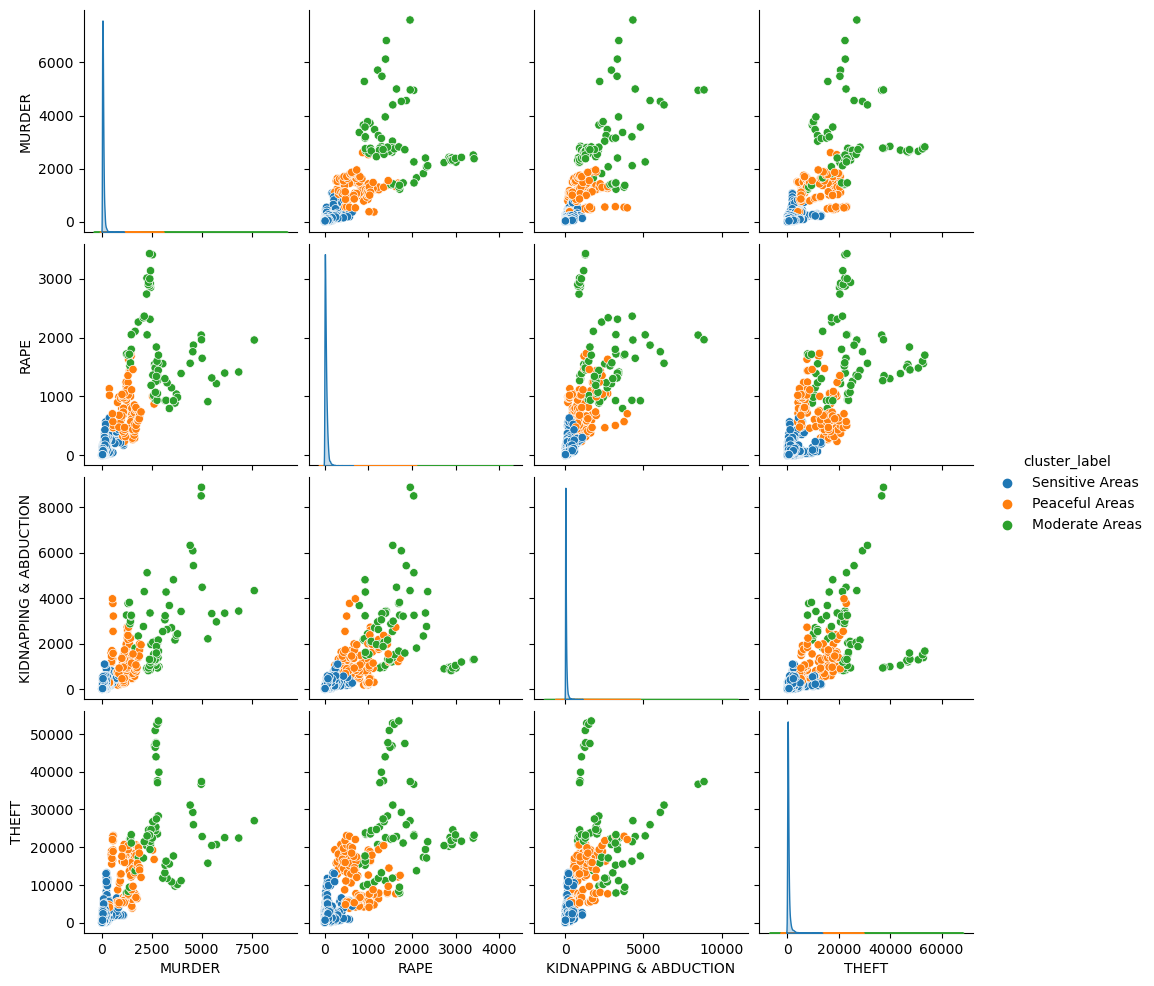

In [69]:
# Pairplot to visualize the distribution of crimes in clusters
sns.pairplot(df, hue='cluster_label', vars=features)
plt.show()

In [68]:
# Step 6: Create Separate DataFrames for Each Cluster

# Create a DataFrame for 'Sensitive Areas'
sensitive_areas_df = df[df['cluster_label'] == 'Sensitive Areas']
print("\nSensitive Areas DataFrame:")
print(sensitive_areas_df.head())


Sensitive Areas DataFrame:
         STATE/UT       DISTRICT  YEAR  MURDER  ATTEMPT TO MURDER  \
0  ANDHRA PRADESH       ADILABAD  2001     101                 60   
1  ANDHRA PRADESH      ANANTAPUR  2001     151                125   
2  ANDHRA PRADESH       CHITTOOR  2001     101                 57   
3  ANDHRA PRADESH       CUDDAPAH  2001      80                 53   
4  ANDHRA PRADESH  EAST GODAVARI  2001      82                 67   

   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
0                                         17    50               0   
1                                          1    23               0   
2                                          2    27               0   
3                                          1    20               0   
4                                          1    23               0   

   OTHER RAPE  KIDNAPPING & ABDUCTION  ...  DOWRY DEATHS  \
0          50                      46  ...            16   
1          23   

In [70]:
# Create a DataFrame for 'Peaceful Areas'
peaceful_areas_df = df[df['cluster_label'] == 'Peaceful Areas']
print("\nPeaceful Areas DataFrame:")
print(peaceful_areas_df.head())



Peaceful Areas DataFrame:
           STATE/UT DISTRICT  YEAR  MURDER  ATTEMPT TO MURDER  \
28   ANDHRA PRADESH    TOTAL  2001    2602               1555   
70            ASSAM    TOTAL  2001    1356                481   
135    CHHATTISGARH    TOTAL  2001     880                529   
169         GUJARAT    TOTAL  2001    1226                537   
253       JHARKHAND    TOTAL  2001    1507                866   

     CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
28                                         136   871               0   
70                                          40   817               0   
135                                         45   959               0   
169                                         94   286               0   
253                                        143   567               0   

     OTHER RAPE  KIDNAPPING & ABDUCTION  ...  DOWRY DEATHS  \
28          871                    1182  ...           420   
70          817          

# 1. What is impacting more crimes in sensitive areas. 

In [71]:
# Calculate mean values of each crime type for each cluster
cluster_summary = df.groupby('cluster_label')[features].mean()
print("Cluster Summary:")
print(cluster_summary)

# Calculate the mean values specifically for the "Sensitive Areas"
sensitive_areas_summary = cluster_summary.loc['Sensitive Areas']
print("\nSensitive Areas Summary:")
print(sensitive_areas_summary)

Cluster Summary:
                      MURDER         RAPE  KIDNAPPING & ABDUCTION  \
cluster_label                                                       
Moderate Areas   3047.957746  1737.492958             2606.436620   
Peaceful Areas   1234.992000   757.408000             1149.688000   
Sensitive Areas    49.235574    29.501871               43.639723   

                        THEFT  
cluster_label                  
Moderate Areas   24842.070423  
Peaceful Areas   12104.968000  
Sensitive Areas    422.191588  

Sensitive Areas Summary:
MURDER                     49.235574
RAPE                       29.501871
KIDNAPPING & ABDUCTION     43.639723
THEFT                     422.191588
Name: Sensitive Areas, dtype: float64


In [81]:
# : Identify Most Impactful Crimes
# Crimes with the highest mean values in "Sensitive Areas"
sensitive_areas_summary = cluster_summary.loc['Sensitive Areas']
highest_crimes_sensitive_areas = sensitive_areas_summary.sort_values(ascending=False)
print("\nCrimes with Highest Mean Values in Sensitive Areas:")
print(highest_crimes_sensitive_areas)


Crimes with Highest Mean Values in Sensitive Areas:
THEFT                     422.191588
MURDER                     49.235574
KIDNAPPING & ABDUCTION     43.639723
RAPE                       29.501871
Name: Sensitive Areas, dtype: float64


# 2. What needs to be done to reduce crime. 

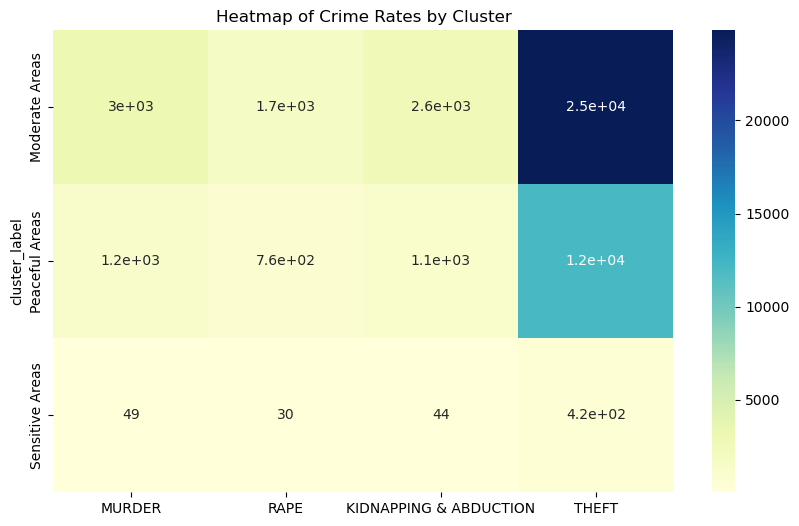

In [83]:
# Create a heatmap to visualize crime rates across clusters
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_summary, annot=True, cmap='YlGnBu')
plt.title('Heatmap of Crime Rates by Cluster')
plt.show()

# 3. Most safe and unsafe districts.

In [88]:
# Define the relevant crime features
crime_features = ['MURDER', 'RAPE', 'KIDNAPPING & ABDUCTION', 'THEFT']  # Modify based on actual columns


In [89]:
# Calculate a composite crime score as the sum of selected crime features
df['crime_score'] = df[crime_features].sum(axis=1)


In [90]:
# Display the first few rows to verify the new column
print(df[['DISTRICT', 'STATE/UT', 'crime_score']].head())

        DISTRICT        STATE/UT  crime_score
0       ADILABAD  ANDHRA PRADESH          396
1      ANANTAPUR  ANDHRA PRADESH          593
2       CHITTOOR  ANDHRA PRADESH          910
3       CUDDAPAH  ANDHRA PRADESH          298
4  EAST GODAVARI  ANDHRA PRADESH         1175


In [91]:
# Sort the districts by crime score in descending order to find the most unsafe districts
unsafe_districts = df.sort_values(by='crime_score', ascending=False)
print("Most Unsafe Districts:")
print(unsafe_districts[['DISTRICT', 'STATE/UT', 'crime_score']].head(10))  # Display top 10 unsafe districts


Most Unsafe Districts:
     DISTRICT       STATE/UT  crime_score
7856    TOTAL    MAHARASHTRA        59637
5531    TOTAL    MAHARASHTRA        58592
7071    TOTAL    MAHARASHTRA        58416
6296    TOTAL    MAHARASHTRA        56352
8657    TOTAL    MAHARASHTRA        53610
8938    TOTAL  UTTAR PRADESH        53183
4781    TOTAL    MAHARASHTRA        53137
3305    TOTAL    MAHARASHTRA        52211
8132    TOTAL  UTTAR PRADESH        52176
4039    TOTAL    MAHARASHTRA        51890


In [93]:
# Sort the districts by crime score in ascending order to find the most safe districts
safe_districts = df.sort_values(by='crime_score', ascending=True)
print("Most Safe Districts:")
print(safe_districts[['DISTRICT', 'STATE/UT', 'crime_score']].head(10))  # Display top 10 safe districts

Most Safe Districts:
            DISTRICT         STATE/UT  crime_score
5535             CID          MANIPUR            0
6866     CRIME JAMMU  JAMMU & KASHMIR            0
7649  CRIME SRINAGAR  JAMMU & KASHMIR            0
6867   CRIME KASHMIR  JAMMU & KASHMIR            0
5101             STF         DELHI UT            0
7648     CRIME JAMMU  JAMMU & KASHMIR            0
8994             CAW         DELHI UT            0
2378  CRIME SRINAGAR  JAMMU & KASHMIR            0
2377     CRIME JAMMU  JAMMU & KASHMIR            0
8661             CID          MANIPUR            0


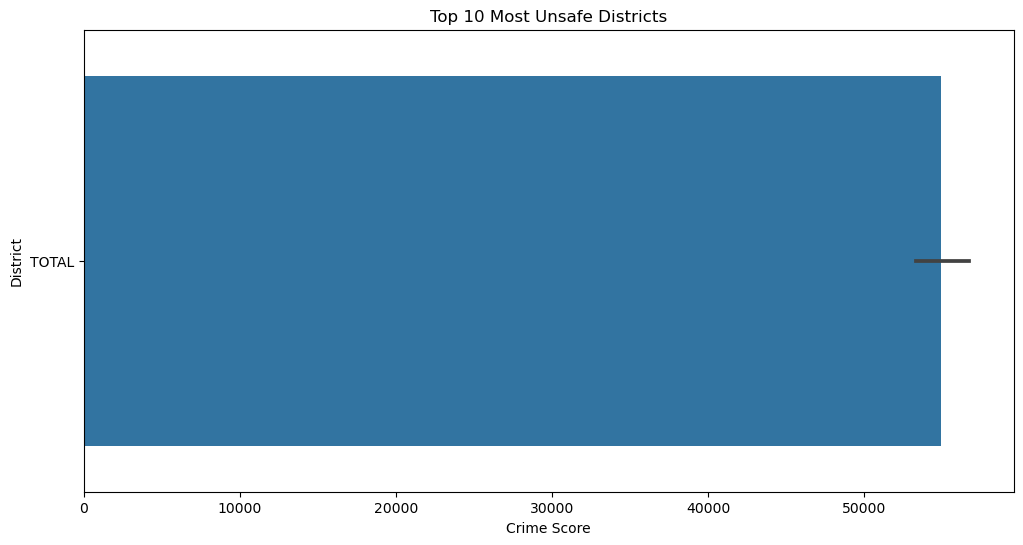

In [94]:
# Plot the most unsafe districts
plt.figure(figsize=(12, 6))
sns.barplot(x='crime_score', y='DISTRICT', data=unsafe_districts.head(10))
plt.title('Top 10 Most Unsafe Districts')
plt.xlabel('Crime Score')
plt.ylabel('District')
plt.show()

# 4. Etc.......Anything that you observe (If you want, you can plot various graphs to analyze)"

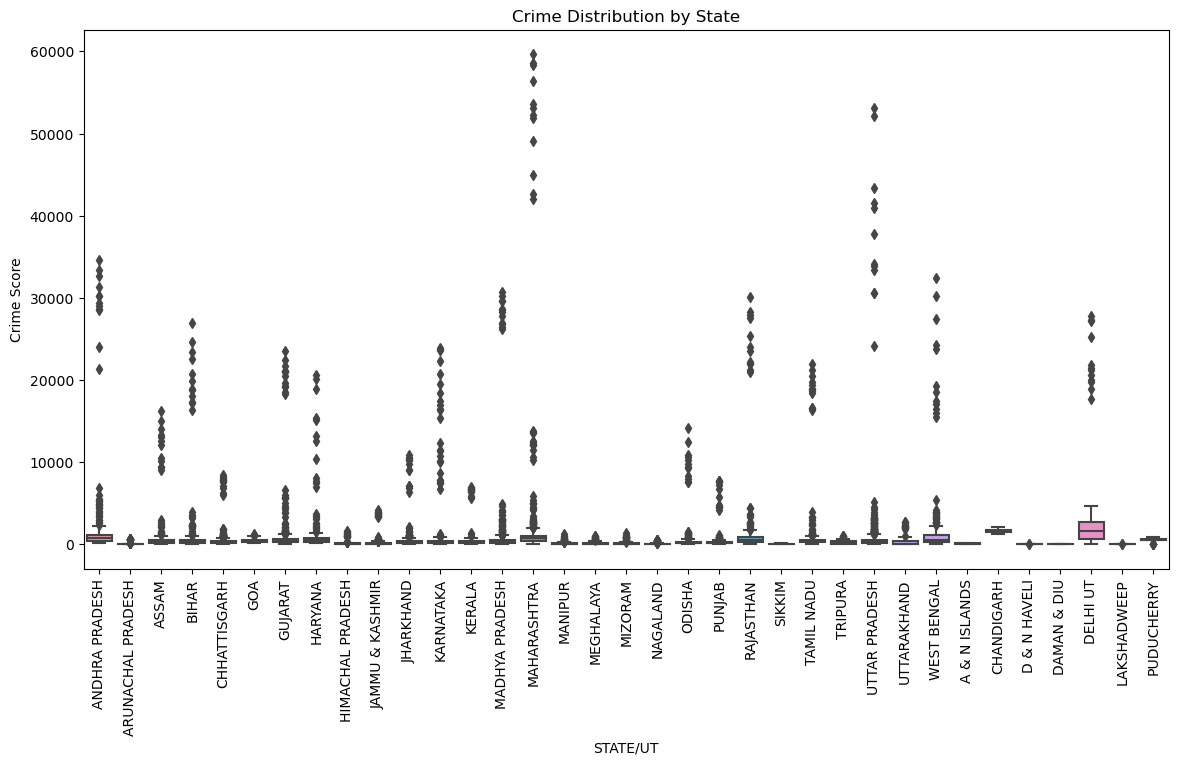

In [101]:
#2. Crime Distribution by State
plt.figure(figsize=(14, 7))
sns.boxplot(x='STATE/UT', y='crime_score', data=df)
plt.title('Crime Distribution by State')
plt.xticks(rotation=90)
plt.xlabel('STATE/UT')
plt.ylabel('Crime Score')
plt.show()

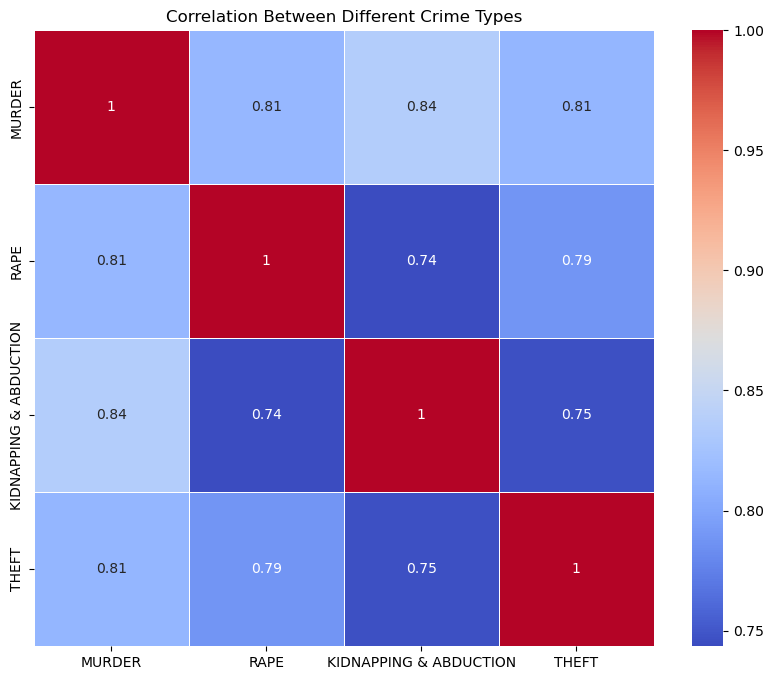

In [102]:
Correlation Between Different Crime Types

# Calculate correlation matrix
correlation_matrix = df[crime_features].corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Different Crime Types')
plt.show()